# Imports

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from ml import *
from rbfn import *

# Cas de tests, rendu 2

## Classification

### Linear Simple :
        Linear Model : OK
        MLP (2, 1)   : OK

In [16]:
X = np.array([
      [2.5, 4],
      [2, 3],
      [3, 3]
])
Y = np.array([
      1,
      -1,
      -1
])

In [ ]:
plt.scatter(X[0, 0], X[0, 1], color='blue')
plt.scatter(X[1:3,0], X[1:3,1], color='red')
plt.show()
plt.clf()

In [ ]:
model_dim = len(X[0])

errors = 0

for _ in range(50):
    test_after = []
    p_model = create_linear_model(model_dim)

    train_linear_classification_model(p_model, model_dim, X, Y, alpha=0.001, epochs=10_000)

    for data, expected in zip(X, Y):
        out = predict_linear_model_classif(p_model, model_dim, data)
        test_after.append(out)
        if out != expected:
            errors += 1
    print(test_after)
    destroy_linear_model(p_model)

print(f"errors: {errors}")

### Linear model (simple)

In [ ]:
input_dim = len(X[0])

p_model = create_linear_model(input_dim)
test_before = predict_linear_model_classif(p_model, input_dim, [1, 1])

print("Before training:", test_before)

train_linear_classification_model(p_model, input_dim, X, Y, alpha=0.001, epochs=10000)


test_after = predict_linear_model_classif(p_model, input_dim , [1, 1])

print("After training:",test_after)

### Linear model (advanced)

In [ ]:
model = create_linear_model(input_dim)
test_dataset = [[x1, x2] for x1 in np.arange(-1, 5, 0.5) for x2 in np.arange(-1, 5, 0.5)]
colors = ["blue" if output >= 0 else "red" for output in Y]

predicted_outputs = [predict_linear_model_classif(model, input_dim,  p) for p in test_dataset]
predicted_outputs_colors = ['blue' if label == 1 else 'red' for label in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in X], [p[1] for p in X], c=colors, s=200)
plt.show()

flattened_dataset_inputs = []
for p in X:
    flattened_dataset_inputs.append(p[0])
    flattened_dataset_inputs.append(p[1])

train_linear_classification_model(model, input_dim, flattened_dataset_inputs, Y, epochs=10000)


predicted_outputs = [predict_linear_model_classif(model,input_dim,  p)  for p in test_dataset]
predicted_outputs_colors = ['blue' if label == 1 else 'red' for label in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in X], [p[1] for p in X], c=colors, s=200)
plt.show()

test_after = predict_linear_model_classif(p_model, input_dim, [1, 1])

print("Prediction after training of [1, 1], the prediction need to be equal to 1. \nPrediction:", test_after)

flattened_dataset_inputs = []
for p in X:
    flattened_dataset_inputs.append(p[0])
    flattened_dataset_inputs.append(p[1])

destroy_linear_model(model)

### MLP (simple)

In [ ]:
input_dim = [len(X[0]), 1]

p_model, _= create_mlp_model(input_dim)
test_before = predict_mlp_model_classification(p_model, [1, 1])

print("Before training:", test_before)

train_classification_stochastic_gradient_backpropagation_mlp_model(p_model, X, Y)

test_after = predict_mlp_model_classification(p_model, [1, 1])

print("After training:", test_after)

### MLP (advanced)

In [ ]:
model, _ = create_mlp_model(input_dim)
test_dataset = [[x1, x2] for x1 in np.arange(-1, 5, 0.5) for x2 in np.arange(-1, 5, 0.5)]
colors = ["blue" if output >= 0 else "red" for output in Y]

predicted_outputs = [predict_mlp_model_classification(model,  p)  for p in test_dataset]
#print(predicted_outputs)
predicted_outputs_colors = ['blue' if label[0] >= 0 else 'red' for label in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in X], [p[1] for p in X], c=colors, s=200)
plt.show()

flattened_dataset_inputs = []
for p in X:
    flattened_dataset_inputs.append(p[0])
    flattened_dataset_inputs.append(p[1])

train_classification_stochastic_gradient_backpropagation_mlp_model(model, X, Y)

predicted_outputs = [predict_mlp_model_classification(model,  p)  for p in test_dataset]
predicted_outputs_colors = ['blue' if label[0] >= 0 else 'red' for label in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in X], [p[1] for p in X], c=colors, s=200)
plt.show()

test_after = predict_mlp_model_classification(p_model , [1, 1])

print("Prediction after training of [1, 1], the result need to be equal to 1. Result:", test_after)

flattened_dataset_inputs = []
for p in X:
    flattened_dataset_inputs.append(p[0])
    flattened_dataset_inputs.append(p[1])

destroy_mlp_model(model)

### RBFN :

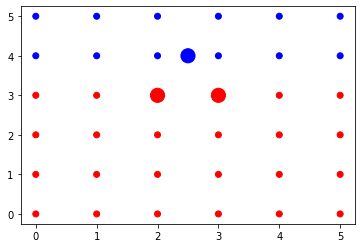

In [18]:
num_classes = 2
k = 2
input_dim = 2
expected_output = [[1,0] if label >= 0 else [0,1] for label in Y]
model = create_rbfn_model(input_dim, num_classes, k)
train_rbfn_model(model, X, expected_output)

colors = ['blue' if coord >= 0 else 'red' for coord in Y]
plot_input = [[x,y] for x in range(6) for y in range(6)]
plot_output_colors = ['blue' if predict[0] > predict[1] else 'red' for predict in [predict_rbfn(model, coord) for coord in plot_input]]
plt.scatter([p[0] for p in X], [p[1] for p in X], c=colors, s=200)
plt.scatter([p[0] for p in plot_input], [p[1] for p in plot_input], c=plot_output_colors)
plt.show()

### Linear Multiple :
        Linear Model : OK
        MLP (2, 1)   : OK

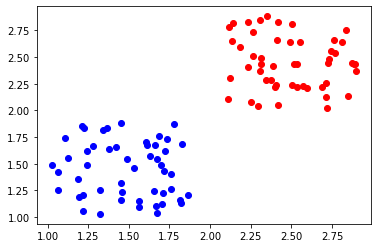

<Figure size 432x288 with 0 Axes>

In [23]:
X = np.concatenate([np.random.random((50,2)) * 0.9 + np.array([1, 1]), np.random.random((50,2)) * 0.9 + np.array([2, 2])])
Y = np.concatenate([np.ones((50, 1)), np.ones((50, 1)) * -1.0])
plt.scatter(X[0:50, 0], X[0:50, 1], color='blue')
plt.scatter(X[50:100,0], X[50:100,1], color='red')
plt.show()
plt.clf()

### Linear model (simple)

In [22]:
input_dim = len(X[0])

p_model = create_linear_model(input_dim)
test_before = predict_linear_model_classif(p_model, input_dim, [1.25, 1.25])

print("Before training:", test_before)

train_linear_classification_model(p_model, input_dim, X, Y)


test_after = predict_linear_model_classif(p_model, input_dim , [1.25, 1.25])

print("After training:",test_after)

Before training: -1.0
After training: -1.0


### Linear model (advanced)

In [ ]:
model = create_linear_model(input_dim)
test_dataset = [[x1, x2] for x1 in np.arange(1, 3, 0.1) for x2 in np.arange(1, 3, 0.1)]
colors = ["blue" if output >= 0 else "red" for output in Y]

predicted_outputs = [predict_linear_model_classif(model, input_dim,  p)  for p in test_dataset]
predicted_outputs_colors = ['blue' if label == 1 else 'red' for label in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in X], [p[1] for p in X], c=colors, s=200)
plt.show()

flattened_dataset_inputs = []
for p in X:
    flattened_dataset_inputs.append(p[0])
    flattened_dataset_inputs.append(p[1])
    #print(flattened_dataset_inputs)

train_linear_classification_model(model, input_dim, X, Y, epochs=100000)

predicted_outputs = [predict_linear_model_classif(model,input_dim,  p)  for p in test_dataset]
predicted_outputs_colors = ['blue' if label == 1 else 'red' for label in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in X], [p[1] for p in X], c=colors, s=200)
plt.show()

test_after = predict_linear_model_classif(p_model, input_dim , [2.5, 2.5])

print("Prediction:", test_after)

flattened_dataset_inputs = []
for p in X:
    flattened_dataset_inputs.append(p[0])
    flattened_dataset_inputs.append(p[1])

destroy_linear_model(model)

### MLP (simple)

In [ ]:
input_dim = [len(X[0]), 1]

p_model, _ = create_mlp_model(input_dim)
test_before = predict_mlp_model_classification(p_model, [1.25, 1.25])

print("Before training:", test_before)

train_classification_stochastic_gradient_backpropagation_mlp_model(p_model, X, Y)

test_after = predict_mlp_model_classification(p_model, [1.25, 1.25])

print("After training:", test_after)

### MLP (advanced)

In [ ]:
model, _= create_mlp_model(input_dim)
test_dataset = [[x1, x2] for x1 in np.arange(1, 3, 0.1) for x2 in np.arange(1, 3, 0.1)]
colors = ["blue" if output >= 0 else "red" for output in Y]

predicted_outputs = [predict_mlp_model_classification(model,  p)  for p in test_dataset]
predicted_outputs_colors = ['blue' if label >= 0 else 'red' for label in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in X], [p[1] for p in X], c=colors, s=200)
plt.show()

flattened_dataset_inputs = []
for p in X:
    flattened_dataset_inputs.append(p[0])
    flattened_dataset_inputs.append(p[1])

train_classification_stochastic_gradient_backpropagation_mlp_model(model, X, Y, epochs=100000)

predicted_outputs = [predict_mlp_model_classification(model,  p)  for p in test_dataset]
predicted_outputs_colors = ['blue' if label >= 0 else 'red' for label in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in X], [p[1] for p in X], c=colors, s=200)
plt.show()

test_after = predict_mlp_model_classification(p_model , [1, 1])

print("Prediction:", test_after)

flattened_dataset_inputs = []
for p in X:
    flattened_dataset_inputs.append(p[0])
    flattened_dataset_inputs.append(p[1])

destroy_mlp_model(model)

### RBFN

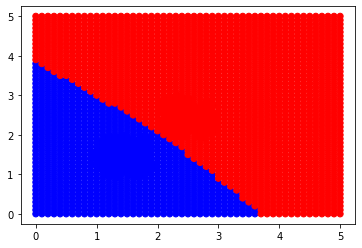

In [27]:
num_classes = 2
k = 20
input_dim = 2
expected_output = [[1,0] if label >= 0 else [0,1] for label in Y]
model = create_rbfn_model(input_dim, num_classes, k)
train_rbfn_model(model, X, expected_output)

colors = ['blue' if coord >= 0 else 'red' for coord in Y]
plot_input = [[x/10,y/10] for x in range(51) for y in range(51)]
plot_output_colors = ['blue' if predict[0] > predict[1] else 'red' for predict in [predict_rbfn(model, coord) for coord in plot_input]]
plt.scatter([p[0] for p in X], [p[1] for p in X], c=colors, s=200)
plt.scatter([p[0] for p in plot_input], [p[1] for p in plot_input], c=plot_output_colors)
plt.show()

### XOR :
        Linear Model    : KO
        MLP (2, 2, 1)   : OK

In [34]:
X = np.array([[1, 0], [0, 1], [0, 0], [1, 1]])
Y = np.array([1, 1, -1, -1])

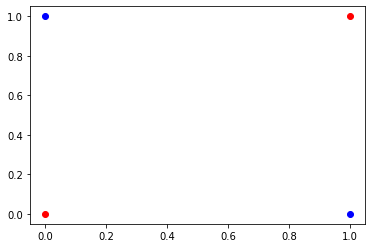

<Figure size 432x288 with 0 Axes>

In [35]:
plt.scatter(X[0:2, 0], X[0:2, 1], color='blue')
plt.scatter(X[2:4,0], X[2:4,1], color='red')
plt.show()
plt.clf()

### Linear model (simple)

In [ ]:
input_dim = len(X[0])

p_model = create_linear_model(input_dim)
test_before = predict_linear_model_classif(p_model, input_dim , [0, 0])

print("Before training:", test_before)

train_linear_classification_model(p_model, input_dim, X, Y)


test_after = predict_linear_model_classif(p_model, input_dim , [0, 0])

print("After training:",test_after)

### Linear model (advanced)

In [ ]:
X = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
Y = np.array([-1, 1, 1, -1])

In [ ]:
input_dim = len(X[0])

model_top = create_linear_model(input_dim)
model_bottom = create_linear_model(input_dim)


test_dataset = [[x1, x2] for x1 in np.arange(-1, 2, 0.1) for x2 in np.arange(-1, 2, 0.1)]
colors = ["blue" if output >= 0 else "red" for output in Y]

predicted_outputs_top = [predict_linear_model_classif(model_top, input_dim,  p)  for p in test_dataset]
predicted_outputs_bottom = [predict_linear_model_classif(model_bottom, input_dim,  p)  for p in test_dataset]

predicted_outputs_colors = ['blue' if top == 1 and bottom == 1 else 'red' for (top, bottom) in zip(predicted_outputs_top, predicted_outputs_bottom)]

plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in X], [p[1] for p in X], c=colors, s=200)
plt.show()

train_linear_classification_model(model_top, input_dim, X[:-1], Y[:-1], alpha=0.01, epochs=100000)
train_linear_classification_model(model_bottom, input_dim, X[1:], Y[1:], alpha=0.01, epochs=100000)


predicted_outputs_top = [predict_linear_model_classif(model_top, input_dim,  p)  for p in test_dataset]
predicted_outputs_bottom = [predict_linear_model_classif(model_bottom, input_dim,  p)  for p in test_dataset]

predicted_outputs_colors = ['blue' if top == 1 and bottom == 1 else 'red' for (top, bottom) in zip(predicted_outputs_top, predicted_outputs_bottom)]

plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in X], [p[1] for p in X], c=colors, s=200)
plt.show()

destroy_linear_model(model_top)
destroy_linear_model(model_bottom)

### MLP (simple)

In [ ]:
input_dim = [len(X[0]), len(X[0]), 1]

p_model, _= create_mlp_model(input_dim)
test_before = predict_mlp_model_classification(p_model, [1, 1])

print("Before training:", test_before)

train_classification_stochastic_gradient_backpropagation_mlp_model(p_model, X, Y)

test_after = predict_mlp_model_classification(p_model, [1, 1])

print("After training:", test_after)

### MLP (advanced)

In [ ]:
model, _ = create_mlp_model(input_dim)
test_dataset = [[x1, x2] for x1 in np.arange(-1, 2, 0.1) for x2 in np.arange(-1, 2, 0.1)]
colors = ["blue" if output >= 0 else "red" for output in Y]

predicted_outputs = [predict_mlp_model_classification(model,  p)  for p in test_dataset]
predicted_outputs_colors = ['blue' if label >= 0 else 'red' for label in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in X], [p[1] for p in X], c=colors, s=200)
plt.show()

flattened_dataset_inputs = []
for p in X:
    flattened_dataset_inputs.append(p[0])
    flattened_dataset_inputs.append(p[1])

train_classification_stochastic_gradient_backpropagation_mlp_model(model, X, Y, epochs=100000)

predicted_outputs = [predict_mlp_model_classification(model,  p)  for p in test_dataset]
predicted_outputs_colors = ['blue' if label >= 0 else 'red' for label in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in X], [p[1] for p in X], c=colors, s=200)
plt.show()

test_after = predict_mlp_model_classification(p_model, [1, 1])

destroy_mlp_model(model)

### RBFN
notre modéle n'arrive pas a gere le XOR

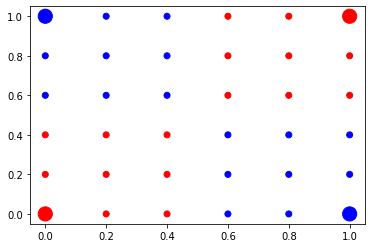

In [36]:
num_classes = 2
k = 4
input_dim = 2
expected_output = [[1,0] if label >= 0 else [0,1] for label in Y]
modif_input = [[coord[0],coord[1]] for coord in X]
model = create_rbfn_model(input_dim, num_classes, k)
train_rbfn_model(model, X, expected_output, naif=True)

colors = ['blue' if coord >= 0 else 'red' for coord in Y]
plot_input = [[x/5,y/5] for x in range(6) for y in range(6)]
plot_output_colors = ['blue' if predict[0] > predict[1] else 'red' for predict in [predict_rbfn(model, coord) for coord in plot_input]]
plt.scatter([p[0] for p in X], [p[1] for p in X], c=colors, s=200)
plt.scatter([p[0] for p in plot_input], [p[1] for p in plot_input], c=plot_output_colors)
plt.show()

### Cross :
        Linear Model    : KO
        MLP (2, 4, 1)   : OK

In [ ]:
X = np.random.random((500, 2)) * 2.0 - 1.0
Y = np.array([1 if abs(p[0]) <= 0.3 or abs(p[1]) <= 0.3 else -1 for p in X])

In [ ]:
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == -1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == -1, enumerate(X)))))[:,1], color='red')
plt.show()
plt.clf()

### Linear model (simple)

In [ ]:
input_dim = len(X[0])

p_model = create_linear_model(input_dim)
test_before = predict_linear_model_classif(p_model, input_dim , [0, 0])

print("Before training:", test_before)

train_linear_classification_model(p_model, input_dim, X, Y)


test_after = predict_linear_model_classif(p_model, input_dim , [0, 0])

print("After training:",test_after)

### Linear model (advanced)

In [ ]:
input_dim = len(X[0])

model_vl = create_linear_model(input_dim)
model_vr = create_linear_model(input_dim)
model_ht = create_linear_model(input_dim)
model_hb = create_linear_model(input_dim)


test_dataset = [[x1, x2] for x1 in np.arange(-2, 2, 0.1) for x2 in np.arange(-2, 2, 0.1)]
colors = ["blue" if output >= 0 else "red" for output in Y]

predicted_outputs_vl = [predict_linear_model_classif(model_vl, input_dim,  p)  for p in test_dataset]
predicted_outputs_vr = [predict_linear_model_classif(model_vr, input_dim,  p)  for p in test_dataset]
predicted_outputs_ht = [predict_linear_model_classif(model_ht, input_dim,  p)  for p in test_dataset]
predicted_outputs_hb = [predict_linear_model_classif(model_hb, input_dim,  p)  for p in test_dataset]

predicted_outputs_colors = ['blue' if (vl == 1 and vr == 1) or (ht == 1 and hb == 1) else 'red' for (vl, vr, ht, hb) in zip(predicted_outputs_vl, predicted_outputs_vr, predicted_outputs_ht, predicted_outputs_hb)]

plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in X], [p[1] for p in X], c=colors, s=200)
plt.show()


ht = np.array([[x[0],x[1],n] for n,x in enumerate(X) if (x[1] > -0.3 and (x[0] > 0.3 or x[0] < -0.3) ) ])
c = ["blue" if Y[int(n)] == 1 else "red" for n in ht[:, 2]]
plt.scatter(ht[:, 0], ht[:, 1], c=c)
plt.axis([-1, 1, -1, 1])
plt.title("Horizontal top")
plt.show()

vr = np.array([[x[0],x[1], int(n)] for n,x in enumerate(X) if x[0] > -0.3 and (x[1] > 0.3 or x[1] < -0.3) ])
c = ["blue" if Y[int(n)] == 1 else "red" for n in vr[:, 2]]
plt.scatter(vr[:, 0], vr[:, 1], c=c)
plt.axis([-1, 1, -1, 1])
plt.title("Vertical right")
plt.show()

vl = np.array([[x[0],x[1],int(n)] for n,x in enumerate(X) if (x[0] < 0.3 and (x[1] < -0.3 or x[1] > 0.3))])
c = ["blue" if Y[int(n)] == 1 else "red" for n in vl[:, 2]]
plt.scatter(vl[:, 0], vl[:, 1], c=c)
plt.axis([-1, 1, -1, 1])
plt.title("Vertical left")
plt.show()

hb = np.array([[x[0],x[1],int(n)] for n,x in enumerate(X) if (x[1] < 0.3 and (x[0] < -0.3 or x[0] > 0.3))])
c = ["blue" if Y[int(n)] == 1 else "red" for n in hb[:, 2]]
plt.scatter(hb[:, 0], hb[:, 1], c=c)
plt.axis([-1, 1, -1, 1])
plt.title("Horizontal bottom")
plt.show()


# On était bloqué la wola
train_linear_classification_model(model_vl, input_dim, vl[:, :-1], Y[vl[:,-1].astype(int)], epochs=100000)
train_linear_classification_model(model_vr, input_dim, vr[:, :-1], Y[vr[:,-1].astype(int)], epochs=100000)
train_linear_classification_model(model_ht, input_dim, ht[:, :-1], Y[ht[:,-1].astype(int)], epochs=100000)
train_linear_classification_model(model_hb, input_dim, hb[:, :-1], Y[hb[:,-1].astype(int)], epochs=100000)


predicted_outputs_vl = [predict_linear_model_classif(model_vl, input_dim,  p)  for p in test_dataset]
predicted_outputs_vr = [predict_linear_model_classif(model_vr, input_dim,  p)  for p in test_dataset]
predicted_outputs_ht = [predict_linear_model_classif(model_ht, input_dim,  p)  for p in test_dataset]
predicted_outputs_hb = [predict_linear_model_classif(model_hb, input_dim,  p)  for p in test_dataset]

predicted_outputs_colors = ['blue' if (vl == 1 and vr == 1) or (ht == 1 and hb == 1) else 'red' for (vl, vr, ht, hb) in zip(predicted_outputs_vl, predicted_outputs_vr, predicted_outputs_ht, predicted_outputs_hb)]

plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in X], [p[1] for p in X], c=colors, s=200)
plt.show()



destroy_linear_model(model_vl)
destroy_linear_model(model_vr)
destroy_linear_model(model_ht)
destroy_linear_model(model_hb)

### MLP (simple)

In [ ]:
input_dim = [len(X[0]), len(X[0])*2, 1]

p_model, _ = create_mlp_model(input_dim)
test_before = predict_mlp_model_classification(p_model, [0, 0])

print("Before training:", test_before)

train_classification_stochastic_gradient_backpropagation_mlp_model(p_model, X, Y)

test_after = predict_mlp_model_classification(p_model, [0, 0])

print("After training:", test_after)

### MLP (advanced)

In [ ]:
model, _ = create_mlp_model(input_dim)
test_dataset = [[x1, x2] for x1 in np.arange(-2, 2, 0.1) for x2 in np.arange(-2, 2, 0.1)]
colors = ["blue" if output >= 0 else "red" for output in Y]

predicted_outputs = [predict_mlp_model_classification(model,  p)  for p in test_dataset]
predicted_outputs_colors = ['blue' if label >= 0 else 'red' for label in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in X], [p[1] for p in X], c=colors, s=200)
plt.show()

flattened_dataset_inputs = []
for p in X:
    flattened_dataset_inputs.append(p[0])
    flattened_dataset_inputs.append(p[1])

train_classification_stochastic_gradient_backpropagation_mlp_model(model, X, Y, alpha=0.01, epochs=200000)

predicted_outputs = [predict_mlp_model_classification(model,  p)  for p in test_dataset]
predicted_outputs_colors = ['blue' if label >= 0 else 'red' for label in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in X], [p[1] for p in X], c=colors, s=200)
plt.show()

test_after = predict_mlp_model_classification(p_model , [1, 1])

destroy_mlp_model(model)

### RBFN :
Comme le XOR les points son trop proche

In [ ]:
num_classes = 2
k = 2
input_dim = 2
expected_output = [[1,0] if coord >= 0 else [0,1] for coord in Y]
modif_input = [[coord[0]*5,coord[1]*5] for coord in X]
model = create_rbfn_model(input_dim, num_classes, k)
train_rbfn_model(model, modif_input, expected_output)

colors = ['blue' if coord >= 0 else 'red' for coord in Y]
plot_input = np.random.random((500, 2)) * 2.0 - 1.0
plot_output_colors = ['blue' if predict[0] > predict[1] else 'red' for predict in [predict_rbfn(model, coord) for coord in plot_input]]
#plt.scatter([p[0] for p in X], [p[1] for p in X], c=colors, s=200)
plt.scatter([p[0] for p in plot_input], [p[1] for p in plot_input], c=plot_output_colors)
plt.show()

### Multi Linear 3 classes :
        Linear Model x3 : OK
        MLP (2, 3)      : OK

In [ ]:
X = np.random.random((500, 2)) * 2.0 - 1.0
Y = np.array([[1, 0, 0] if -p[0] - p[1] - 0.5 > 0 and p[1] < 0 and p[0] - p[1] - 0.5 < 0 else # bleu
              [0, 1, 0] if -p[0] - p[1] - 0.5 < 0 and p[1] > 0 and p[0] - p[1] - 0.5 < 0 else # rouge
              [0, 0, 1] if -p[0] - p[1] - 0.5 < 0 and p[1] < 0 and p[0] - p[1] - 0.5 > 0 else # vert
              [0, 0, 0]for p in X])

In [ ]:
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,1], color='red')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,1], color='green')
plt.show()
plt.clf()

### Linear model (simple)

In [ ]:
input_dim = 2

p_model = create_linear_model(input_dim)
test_before = predict_linear_model_classif(p_model, input_dim, [-0.75, -0.50])

print("Before training:", test_before)

flattened_Y = Y[-1].flatten()

train_linear_classification_model(p_model, input_dim, X, flattened_Y)

test_after = predict_linear_model_classif(p_model, input_dim, [-0.75, -0.50])

print("After training:",test_after)

### Linear model (advanced)

In [ ]:
input_dim = len(X[0])


model_dr = create_linear_model(input_dim)
model_dl = create_linear_model(input_dim)
model_h = create_linear_model(input_dim)

test_dataset = [[x1, x2] for x1 in np.arange(-1.5, 1.5, 0.1) for x2 in np.arange(-1.5, 1.5, 0.1)]
colors = ["blue" if output[0] == 1 else ("red" if output[1] == 1 else ("green" if output[2] == 1 else "black")) for output in Y]

dr = np.array([1 if y[2] == 1 else -1 for y in Y])
h = np.array([1 if y[1] == 1 else -1 for y in Y])
dl = np.array([1 if y[0] == 1 else -1 for y in Y])

predicted_outputs_dr = [predict_linear_model_classif(model_dr, input_dim,  p)  for p in test_dataset]
predicted_outputs_dl = [predict_linear_model_classif(model_dl, input_dim,  p)  for p in test_dataset]
predicted_outputs_h = [predict_linear_model_classif(model_h, input_dim,  p)  for p in test_dataset]


predicted_outputs_colors = ['green' if (dr == 1 and dl == -1 and h == -1) else ("blue" if (dl == 1 and dr == -1 and h == -1) else ("red" if (h == 1 and dr == -1 and dl == -1) else "black")) for (dr, dl, h) in zip(predicted_outputs_dr, predicted_outputs_dl, predicted_outputs_h)]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in X], [p[1] for p in X], c=colors, s=40)
plt.show()


flattened_dataset_outputs = []
for p in Y:
    flattened_dataset_outputs.append(p[0])
    flattened_dataset_outputs.append(p[1])
    flattened_dataset_outputs.append(p[2])
    

train_linear_classification_model(model_dl, input_dim, X, dl, alpha=0.01, epochs=100000)
train_linear_classification_model(model_dr, input_dim, X, dr, alpha=0.01, epochs=100000)
train_linear_classification_model(model_h, input_dim, X, h, alpha=0.01, epochs=100000)


predicted_outputs_dr = [predict_linear_model_classif(model_dr, input_dim,  p)  for p in test_dataset]
predicted_outputs_dl = [predict_linear_model_classif(model_dl, input_dim,  p)  for p in test_dataset]
predicted_outputs_h = [predict_linear_model_classif(model_h, input_dim,  p)  for p in test_dataset]

predicted_outputs_colors = ['green' if (dr == 1 and dl == -1 and h == -1) else ("blue" if (dl == 1 and dr == -1 and h == -1) else ("red" if (h == 1 and dr == -1 and dl == -1) else "black")) for (dr, dl, h) in zip(predicted_outputs_dr, predicted_outputs_dl, predicted_outputs_h)]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in X], [p[1] for p in X], c=colors, s=40)
plt.show()

### MLP (simple)

In [ ]:
input_dim = [len(X[0]), 3]

p_model, len_output_layer = create_mlp_model(input_dim)
test_before = predict_mlp_model_classification(p_model, np.array([-0.75, -0.50]), len_output_layer)

print("Before training:", test_before)

train_classification_stochastic_gradient_backpropagation_mlp_model(p_model, X, Y.flatten())

test_after = predict_mlp_model_classification(p_model, np.array([-0.75, -0.50]), len_output_layer)

print("After training:", test_after)

### MLP (advanced)

In [ ]:
input_dim = [len(X[0]), 3]

model, len_output_layer = create_mlp_model(input_dim)
test_dataset = [[x1, x2] for x1 in np.arange(-1.5, 1.6, 0.2) for x2 in np.arange(-1.5, 1.6, 0.2)]
colors = ["blue" if np.argmax(output) == 0 else ("red" if np.argmax(output) == 1 else "green") for output in Y]

predicted_outputs = [predict_mlp_model_classification(model, p, len_output_layer)  for p in test_dataset]
predicted_outputs_colors = ["blue" if np.argmax(output) == 0 else ("red" if np.argmax(output) == 1 else "green") for output in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in X], [p[1] for p in X], c=colors, s=50)
plt.show()

train_classification_stochastic_gradient_backpropagation_mlp_model(model, X, Y.flatten())

predicted_outputs = [predict_mlp_model_classification(model, p, len_output_layer)  for p in test_dataset]
predicted_outputs_colors = ["blue" if np.argmax(output) == 0 else ("red" if np.argmax(output) == 1 else "green") for output in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in X], [p[1] for p in X], c=colors, s=50)
plt.show()

flattened_dataset_inputs = []
for p in X:
    flattened_dataset_inputs.append(p[0])
    flattened_dataset_inputs.append(p[1])

destroy_mlp_model(model)

### Multi Cross :
        Linear Model x3 : KO
        MLP (2, ?, ?, 3): OK

In [ ]:
X = np.random.random((1000, 2)) * 2.0 - 1.0
Y = np.array([[1, 0, 0] if abs(p[0] % 0.5) <= 0.25 and abs(p[1] % 0.5) > 0.25 else [0, 1, 0] if abs(p[0] % 0.5) > 0.25 and abs(p[1] % 0.5) <= 0.25 else [0, 0, 1] for p in X])

In [ ]:
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,1], color='red')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,1], color='green')
plt.show()
plt.clf()

### Linear model (simple)

In [ ]:
input_dim = len(X[0])

p_model = create_linear_model(input_dim)
test_before = predict_linear_model_classif(p_model, input_dim , [2, 2])

print("Before training:", test_before)

flattened_X = X.flatten()

train_linear_classification_model(p_model, input_dim, flattened_X, Y)


test_after = predict_linear_model_classif(p_model, input_dim , [2, 2])

print("After training:",test_after)

### Linear model (advanced)

In [ ]:
model = create_linear_model(input_dim)
test_dataset = [[x1, x2] for x1 in range(1, 2) for x2 in range(1, 2)]
colors = ["blue" if output >= 0 else "red" for output in Y]

predicted_outputs = [predict_linear_model_classif(model, input_dim,  p)  for p in test_dataset]
predicted_outputs_colors = ['blue' if label == 1 else 'red' for label in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in X], [p[1] for p in X], c=colors, s=200)
plt.show()

flattened_dataset_inputs = []
for p in X:
    flattened_dataset_inputs.append(p[0])
    flattened_dataset_inputs.append(p[1])

train_linear_classification_model(model, input_dim, flattened_dataset_inputs, Y)

predicted_outputs = [predict_linear_model_classif(model,input_dim,  p)  for p in test_dataset]
predicted_outputs_colors = ['blue' if label == 1 else 'red' for label in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in X], [p[1] for p in X], c=colors, s=200)
plt.show()

test_after = predict_linear_model_classif(p_model, input_dim , [1.25, 1.25])

print("Prediction:", test_after)

flattened_dataset_inputs = []
for p in X:
    flattened_dataset_inputs.append(p[0])
    flattened_dataset_inputs.append(p[1])

destroy_linear_model(model)

### MLP (simple)

In [ ]:
input_dim = [len(X[0]),2,2,3]

p_model, len_output_layer = create_mlp_model(input_dim)
test_before = predict_mlp_model_classification(p_model, [2.5, 2.5], len_output_layer)

print("Before training:", test_before)

train_classification_stochastic_gradient_backpropagation_mlp_model(p_model, X, Y.flatten(), epochs=10000)

test_after = predict_mlp_model_classification(p_model, [2.5, 2.5], len_output_layer)

print("After training:", test_after)

### MLP (advanced)

In [ ]:
input_dim = [len(X[0]),26,26,3]


model, len_output_layer = create_mlp_model(input_dim)
test_dataset = [[x1, x2] for x1 in np.arange(-2, 2,0.1) for x2 in np.arange(-2, 2, 0.1)]
colors = ["blue" if np.argmax(output) == 0 else ("red" if np.argmax(output) == 1 else "green") for output in Y]

predicted_outputs = [predict_mlp_model_classification(model, p, len_output_layer)  for p in test_dataset]
predicted_outputs_colors = ["blue" if np.argmax(output) == 0 else ("red" if np.argmax(output) == 1 else "green") for output in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in X], [p[1] for p in X], c=colors, s=100)
plt.show()


train_classification_stochastic_gradient_backpropagation_mlp_model(model, X, Y.flatten(), alpha=0.03, epochs=1000000)

predicted_outputs = [predict_mlp_model_classification(model, p, len_output_layer)  for p in test_dataset]
predicted_outputs_colors = ["blue" if np.argmax(output) == 0 else ("red" if np.argmax(output) == 1 else "green") for output in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
#plt.scatter([p[0] for p in X], [p[1] for p in X], c=colors, s=100)
plt.show()


destroy_mlp_model(model)

## Régression

### Linear Simple 2D :
        Linear Model : OK
        MLP (1, 1)   : OK

In [ ]:
X = np.array([
      [1],
      [2]
])
Y = np.array([
      2,
      3
])

In [ ]:
plt.scatter(X,Y)
plt.show()
plt.clf()

### Linear model (simple)

In [ ]:
input_dim = len(X[0])

model = create_linear_model(input_dim)

flattened_dataset_inputs = np.array(X).flatten()

test_before = predict_linear_model_regression(model, input_dim, [3])

train_linear_regression_model(model, input_dim, flattened_dataset_inputs, Y)

test_after = predict_linear_model_regression(model, input_dim, [3])

print("before:", test_before)
print("after:", test_after)

destroy_linear_model(model)

### Linear model (advanced)

In [ ]:
input_dim = len(X[0])

model = create_linear_model(input_dim)
flattened_dataset_inputs = []
for p in X:
    flattened_dataset_inputs.append(p[0])

test_dataset_inputs = [i for i in range(0, 6)]
predicted_outputs = [predict_linear_model_regression(model, input_dim, [p])  for p in test_dataset_inputs]

plt.plot(test_dataset_inputs, predicted_outputs)
plt.scatter([p[0] for p in X], Y, s=200)
plt.axis([0, 5, 0, 5])
plt.show()

train_linear_regression_model(model, input_dim, flattened_dataset_inputs, Y)

test_dataset_inputs = [i for i in range(0, 6)]
predicted_outputs = [predict_linear_model_regression(model, input_dim, [p])  for p in test_dataset_inputs]

plt.plot(test_dataset_inputs, predicted_outputs)
plt.scatter([p[0] for p in X], Y, s=200)
plt.axis([0, 5, 0, 5])
plt.show()

destroy_linear_model(model)

### MLP (simple)

In [ ]:
model, _ = create_mlp_model([1, 1])    

test_before = predict_mlp_model_regression(model, [3])[0]

train_regression_stochastic_gradient_backpropagation_mlp_model(model, 
                                                               X, 
                                                               Y)

test_after = predict_mlp_model_regression(model, [3])[0]

print("before:", test_before)
print("after:", test_after)

destroy_mlp_model(model)

### MLP (advanced)

In [ ]:
model, _ = create_mlp_model([1, 1])    

test_dataset_inputs = [i for i in range(-10, 11)]
predicted_outputs = [predict_mlp_model_regression(model, [p])[0]  for p in test_dataset_inputs]

plt.plot(test_dataset_inputs, predicted_outputs)
plt.scatter([p[0] for p in X], Y, s=200)
plt.axis([-10, 10, -10, 10])
plt.show()

train_regression_stochastic_gradient_backpropagation_mlp_model(model, 
                                                               X, 
                                                               Y)

test_dataset_inputs = [i for i in range(-10, 11)]
predicted_outputs = [predict_mlp_model_regression(model, [p])[0]  for p in test_dataset_inputs]

plt.plot(test_dataset_inputs, predicted_outputs)
plt.scatter([p[0] for p in X], Y, s=200)
plt.axis([-10, 10, -10, 10])
plt.show()

### Non Linear Simple 2D :
        Linear Model    : OK
        MLP (1, ?, 1)   : OK

In [ ]:
X = np.array([
      [1],
      [2],
      [3]
])
Y = np.array([
      2,
      3,
      2.5
])

In [ ]:
plt.scatter(X,Y)
plt.show()
plt.clf()

### Linear model (simple)

In [ ]:
input_dim = len(X[0])

model = create_linear_model(input_dim)

flattened_dataset_inputs = np.array(X).flatten()

test_before = predict_linear_model_regression(model, input_dim, [3])

train_linear_regression_model(model, input_dim, flattened_dataset_inputs, Y)

test_after = predict_linear_model_regression(model, input_dim, [3])

print("before:", test_before)
print("after:", test_after)

destroy_linear_model(model)

### Linear model (advanced)

In [ ]:
input_dim = len(X[0])

model = create_linear_model(input_dim)
flattened_dataset_inputs = []
for p in X:
    flattened_dataset_inputs.append(p[0])

test_dataset_inputs = [i for i in range(0, 6)]
predicted_outputs = [predict_linear_model_regression(model, input_dim, [p])  for p in test_dataset_inputs]

plt.plot(test_dataset_inputs, predicted_outputs)
plt.scatter([p[0] for p in X], Y, s=200)
plt.axis([0, 4, 0, 4])
plt.show()

train_linear_regression_model(model, input_dim, flattened_dataset_inputs, Y)

test_dataset_inputs = [i for i in range(0, 6)]
predicted_outputs = [predict_linear_model_regression(model, input_dim, [p])  for p in test_dataset_inputs]

plt.plot(test_dataset_inputs, predicted_outputs)
plt.scatter([p[0] for p in X], Y, s=200)
plt.axis([0, 4, 0, 4])
plt.show()

destroy_linear_model(model)

### MLP (simple)

In [ ]:
model, _ = create_mlp_model([1, 1, 1])    

test_before = predict_mlp_model_regression(model, [3])[0]

train_regression_stochastic_gradient_backpropagation_mlp_model(model, 
                                                               X, 
                                                               Y)

test_after = predict_mlp_model_regression(model, [3])[0]

print("before:", test_before)
print("after:", test_after)

destroy_mlp_model(model)

### MLP (advanced)

In [ ]:
model, _ = create_mlp_model([1, 2, 1])    

test_dataset_inputs = [i for i in range(-10, 11)]
predicted_outputs = [predict_mlp_model_regression(model, [p])[0]  for p in test_dataset_inputs]

plt.plot(test_dataset_inputs, predicted_outputs)
plt.scatter([p[0] for p in X], Y, s=200)
plt.axis([0,4,0,4])
plt.show()

train_regression_stochastic_gradient_backpropagation_mlp_model(model, 
                                                               X, 
                                                               Y,
                                                               epochs=1000000)

test_dataset_inputs = [i for i in range(-10, 11)]
predicted_outputs = [predict_mlp_model_regression(model, [p])[0]  for p in test_dataset_inputs]

plt.plot(test_dataset_inputs, predicted_outputs)
plt.scatter([p[0] for p in X], Y, s=200)
plt.axis([0,4,0,4])
plt.show()

### Linear Simple 3D :
        Linear Model    : OK
        MLP (2, 1)      : OK

In [ ]:
X = np.array([
      [1, 1],
      [2, 2],
      [6, 1]
])
Y = np.array([
      2,
      3,
      5
])

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
#!pip install plotly
import plotly.express as px
import pandas as pd
import plotly.io as pio
pio.renderers.default='notebook'

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],Y)
plt.show()
plt.clf()

### Linear model (simple)

In [ ]:
input_dim = len(X[0])

model = create_linear_model(input_dim)

flattened_dataset_inputs = np.array(X).flatten()

test_before = predict_linear_model_regression(model, input_dim, [1, 1])

train_linear_regression_model(model, input_dim, flattened_dataset_inputs, Y)

test_after = predict_linear_model_regression(model, input_dim, [1, 1])

print("before:", test_before)
print("after:", test_after)

destroy_linear_model(model)

### Linear model (advanced)

In [ ]:
input_dim = len(X[0])

model = create_linear_model(input_dim)
    
flattened_dataset_inputs = np.array(X).flatten()

test_dataset_inputs = np.array([[i, j] for i in np.arange(0, 6, 0.1) for j in np.arange(0, 6, 0.1)])
predicted_outputs = np.array([predict_linear_model_regression(model, input_dim, x)  for x in test_dataset_inputs])

df = pd.DataFrame({"cat": ["A" for _ in range(len(test_dataset_inputs))], "x0": test_dataset_inputs[:, 0], "x1": test_dataset_inputs[:, 1], "z_prev":predicted_outputs})

old = {"cat": ["B", "B", "B"], "x0": X[:,0], "x1": X[:,1], "z_prev":Y}

df2 = pd.DataFrame(old)
d = pd.concat([df, df2], ignore_index = True)
d.reset_index()

fig = px.scatter_3d(d, x="x0", y="x1", z="z_prev", color="cat", size=[10 for _ in range(len(d))])
fig.show("notebook")

train_linear_regression_model(model, input_dim, flattened_dataset_inputs, Y)

predicted_outputs = np.array([predict_linear_model_regression(model, input_dim, x)  for x in test_dataset_inputs])

df_aft = pd.DataFrame({"cat": ["A" for _ in range(len(test_dataset_inputs))], "x0": test_dataset_inputs[:, 0], "x1": test_dataset_inputs[:, 1], "z_aft":predicted_outputs})

old2 = {"cat": ["B", "B", "B"], "x0": X[:,0], "x1": X[:,1], "z_aft":Y}

df2 = pd.DataFrame(old2)
d_aft = pd.concat([df_aft, df2], ignore_index = True)
d_aft.reset_index()


fig = px.scatter_3d(d_aft, x="x0", y="x1", z="z_aft", color="cat", size=[10 for _ in range(len(d_aft))])
fig.show("notebook")

destroy_linear_model(model)

### MLP (simple)

In [ ]:
input_dim = [len(X[0]), 1]

model, _ = create_mlp_model(input_dim)

test_before = predict_mlp_model_regression(model, [1, 1])[0]

train_regression_stochastic_gradient_backpropagation_mlp_model(model, 
                                                               X, 
                                                               Y,
                                                              epochs=100000)


test_after = predict_mlp_model_regression(model, [1, 1])[0]

print("before:", test_before)
print("after:", test_after)

destroy_mlp_model(model)

### MLP (advanced)

In [ ]:
input_dim = [len(X[0]), 1] 

model, _ = create_mlp_model(input_dim)
    
test_dataset_inputs = np.array([[i, j] for i in np.arange(0, 6, 0.1) for j in np.arange(0, 6, 0.1)])
predicted_outputs = np.array([predict_mlp_model_regression(model, x)[0] for x in test_dataset_inputs])

df = pd.DataFrame({"cat": ["A" for _ in range(len(test_dataset_inputs))], "x0": test_dataset_inputs[:, 0], "x1": test_dataset_inputs[:, 1], "z_prev":predicted_outputs})

old = {"cat": ["B", "B", "B"], "x0": X[:,0], "x1": X[:,1], "z_prev":Y}

df2 = pd.DataFrame(old)
d = pd.concat([df, df2], ignore_index = True)
d.reset_index()

fig = px.scatter_3d(d, x="x0", y="x1", z="z_prev", color="cat", size=[10 for _ in range(len(d))])
fig.show("notebook")

train_regression_stochastic_gradient_backpropagation_mlp_model(model, 
                                                               X, 
                                                               Y,
                                                              epochs=100000)


predicted_outputs = np.array([predict_mlp_model_regression(model, x)[0]  for x in test_dataset_inputs])

df_aft = pd.DataFrame({"cat": ["A" for _ in range(len(test_dataset_inputs))], "x0": test_dataset_inputs[:, 0], "x1": test_dataset_inputs[:, 1], "z_aft":predicted_outputs})

old2 = {"cat": ["B", "B", "B"], "x0": X[:,0], "x1": X[:,1], "z_aft":Y}

df2 = pd.DataFrame(old2)
d_aft = pd.concat([df_aft, df2], ignore_index = True)
d_aft.reset_index()


fig = px.scatter_3d(d_aft, x="x0", y="x1", z="z_aft", color="cat", size=[10 for _ in range(len(d_aft))])
fig.show("notebook")

destroy_mlp_model(model)

### Linear Tricky 3D :
        Linear Model    : OK
        MLP (2, 1)      : OK

In [ ]:
X = np.array([
      [1, 1],
      [2, 2],
      [3, 3]
])
Y = np.array([
      1,
      2,
      3
])

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],Y)
plt.show()
plt.clf()

### Linear model (simple)

In [ ]:
input_dim = len(X[0])

model = create_linear_model(input_dim)

flattened_dataset_inputs = np.array(X).flatten()

test_before = predict_linear_model_regression(model, input_dim, [1, 1])

train_linear_regression_model(model, input_dim, flattened_dataset_inputs, Y)

test_after = predict_linear_model_regression(model, input_dim, [1, 1])

print("before:", test_before)
print("after:", test_after)

destroy_linear_model(model)

### Linear model (advanced)

In [ ]:
input_dim = len(X[0]) # 2

model = create_linear_model(input_dim)
    
flattened_dataset_inputs = np.array(X).flatten()

test_dataset_inputs = np.array([[i, j] for i in np.arange(0, 6, 0.1) for j in np.arange(0, 6, 0.1)])
predicted_outputs = np.array([predict_linear_model_regression(model, input_dim, x)  for x in test_dataset_inputs])

df = pd.DataFrame({"cat": ["A" for _ in range(len(test_dataset_inputs))], "x0": test_dataset_inputs[:, 0], "x1": test_dataset_inputs[:, 1], "z_prev":predicted_outputs})

old = {"cat": ["B", "B", "B"], "x0": X[:,0], "x1": X[:,1], "z_prev":Y}

df2 = pd.DataFrame(old)
d = pd.concat([df, df2], ignore_index = True)
d.reset_index()

fig = px.scatter_3d(d, x="x0", y="x1", z="z_prev", color="cat", size=[10 for _ in range(len(d))])
fig.show("notebook")
#print(df.head())

train_linear_regression_model(model, input_dim, flattened_dataset_inputs, Y)

predicted_outputs = np.array([predict_linear_model_regression(model, input_dim, x)  for x in test_dataset_inputs])

df_aft = pd.DataFrame({"cat": ["A" for _ in range(len(test_dataset_inputs))], "x0": test_dataset_inputs[:, 0], "x1": test_dataset_inputs[:, 1], "z_aft":predicted_outputs})

old2 = {"cat": ["B", "B", "B"], "x0": X[:,0], "x1": X[:,1], "z_aft":Y}

df2 = pd.DataFrame(old2)
d_aft = pd.concat([df_aft, df2], ignore_index = True)
d_aft.reset_index()


fig = px.scatter_3d(d_aft, x="x0", y="x1", z="z_aft", color="cat", size=[10 for _ in range(len(d_aft))])
fig.show("notebook")

destroy_linear_model(model)

### MLP (simple)

In [ ]:
input_dim = [len(X[0]), 1]

model, _ = create_mlp_model(input_dim)

test_before = predict_mlp_model_regression(model, [1, 1])[0]

train_regression_stochastic_gradient_backpropagation_mlp_model(model, 
                                                               X, 
                                                               Y,
                                                               epochs=100000)


test_after = predict_mlp_model_regression(model, [1, 1])[0]

print("before:", test_before)
print("after:", test_after)

destroy_mlp_model(model)

### MLP (advanced)

In [ ]:
input_dim = [len(X[0]), 1]

model, _ = create_mlp_model(input_dim)
    
test_dataset_inputs = np.array([[i, j] for i in np.arange(0, 6, 0.1) for j in np.arange(0, 6, 0.1)])
predicted_outputs = np.array([predict_mlp_model_regression(model, x)[0] for x in test_dataset_inputs])

df = pd.DataFrame({"cat": ["A" for _ in range(len(test_dataset_inputs))], "x0": test_dataset_inputs[:, 0], "x1": test_dataset_inputs[:, 1], "z_prev":predicted_outputs})

old = {"cat": ["B", "B", "B"], "x0": X[:,0], "x1": X[:,1], "z_prev":Y}

df2 = pd.DataFrame(old)
d = pd.concat([df, df2], ignore_index = True)
d.reset_index()

fig = px.scatter_3d(d, x="x0", y="x1", z="z_prev", color="cat", size=[10 for _ in range(len(d))])
fig.show("notebook")

train_regression_stochastic_gradient_backpropagation_mlp_model(model, 
                                                               X, 
                                                               Y,
                                                              epochs=100000)


predicted_outputs = np.array([predict_mlp_model_regression(model, x)[0]  for x in test_dataset_inputs])

df_aft = pd.DataFrame({"cat": ["A" for _ in range(len(test_dataset_inputs))], "x0": test_dataset_inputs[:, 0], "x1": test_dataset_inputs[:, 1], "z_aft":predicted_outputs})

old2 = {"cat": ["B", "B", "B"], "x0": X[:,0], "x1": X[:,1], "z_aft":Y}

df2 = pd.DataFrame(old2)
d_aft = pd.concat([df_aft, df2], ignore_index = True)
d_aft.reset_index()


fig = px.scatter_3d(d_aft, x="x0", y="x1", z="z_aft", color="cat", size=[10 for _ in range(len(d_aft))])
fig.show("notebook")

destroy_mlp_model(model)

### Non Linear Simple 3D :
        Linear Model       : KO
        MLP (2, 2, 1)      : OK

In [ ]:
X = np.array([
      [1, 0],
      [0, 1],
      [1, 1],
      [0, 0],
])
Y = np.array([
      2,
      1,
      -2,
      -1
])

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],Y)
plt.show()
plt.clf()

### Linear model (simple)

In [ ]:
input_dim = len(X[0])

model = create_linear_model(input_dim)

flattened_dataset_inputs = np.array(X).flatten()

test_before = predict_linear_model_regression(model, input_dim, [1, 0])

train_linear_regression_model(model, input_dim, flattened_dataset_inputs, Y)

test_after = predict_linear_model_regression(model, input_dim, [1, 0])

print("before:", test_before)
print("after:", test_after)

destroy_linear_model(model)

### Linear model (advanced)

In [ ]:
input_dim = len(X[0])

model = create_linear_model(input_dim)
    
flattened_dataset_inputs = np.array(X).flatten()

test_dataset_inputs = np.array([[i, j] for i in np.arange(0, 6, 0.1) for j in np.arange(0, 6, 0.1)])
predicted_outputs = np.array([predict_linear_model_regression(model, input_dim, x)  for x in test_dataset_inputs])

df = pd.DataFrame({"cat": ["A" for _ in range(len(test_dataset_inputs))], "x0": test_dataset_inputs[:, 0], "x1": test_dataset_inputs[:, 1], "z_prev":predicted_outputs})

old = {"cat": ["B", "B", "B", "B"], "x0": X[:,0], "x1": X[:,1], "z_prev":Y}

df2 = pd.DataFrame(old)
d = pd.concat([df, df2], ignore_index = True)
d.reset_index()

fig = px.scatter_3d(d, x="x0", y="x1", z="z_prev", color="cat", size=[10 for _ in range(len(d))])
fig.show("notebook")

train_linear_regression_model(model, input_dim, flattened_dataset_inputs, Y)

predicted_outputs = np.array([predict_linear_model_regression(model, input_dim, x)  for x in test_dataset_inputs])

df_aft = pd.DataFrame({"cat": ["A" for _ in range(len(test_dataset_inputs))], "x0": test_dataset_inputs[:, 0], "x1": test_dataset_inputs[:, 1], "z_aft":predicted_outputs})

old2 = {"cat": ["B", "B", "B", "B"], "x0": X[:,0], "x1": X[:,1], "z_aft":Y}

df2 = pd.DataFrame(old2)
d_aft = pd.concat([df_aft, df2], ignore_index = True)
d_aft.reset_index()


fig = px.scatter_3d(d_aft, x="x0", y="x1", z="z_aft", color="cat", size=[10 for _ in range(len(d_aft))])
fig.show("notebook")

destroy_linear_model(model)

### MLP (simple)

In [ ]:
input_dim = [len(X[0]), len(X[0]), 1]

model, _ = create_mlp_model(input_dim)

test_before = predict_mlp_model_regression(model, [1, 0])[0]

train_regression_stochastic_gradient_backpropagation_mlp_model(model, 
                                                               X, 
                                                               Y,
                                                               epochs=100000)


test_after = predict_mlp_model_regression(model, [1, 0])[0]

print("before:", test_before)
print("after:", test_after)

destroy_mlp_model(model)

### MLP (advanced)

In [ ]:
input_dim = [len(X[0]), len(X[0]), 1]

model, _ = create_mlp_model(input_dim)
    
test_dataset_inputs = np.array([[i, j] for i in np.arange(0, 6, 0.1) for j in np.arange(0, 6, 0.1)])
predicted_outputs = np.array([predict_mlp_model_regression(model, x)[0] for x in test_dataset_inputs])

df = pd.DataFrame({"cat": ["A" for _ in range(len(test_dataset_inputs))], "x0": test_dataset_inputs[:, 0], "x1": test_dataset_inputs[:, 1], "z_prev":predicted_outputs})

old = {"cat": ["B", "B", "B", "B"], "x0": X[:,0], "x1": X[:,1], "z_prev":Y}

df2 = pd.DataFrame(old)
d = pd.concat([df, df2], ignore_index = True)
d.reset_index()

fig = px.scatter_3d(d, x="x0", y="x1", z="z_prev", color="cat", size=[10 for _ in range(len(d))])
fig.show("notebook")

train_regression_stochastic_gradient_backpropagation_mlp_model(model, 
                                                               X, 
                                                               Y,
                                                               alpha=0.01,
                                                              epochs=100000)


predicted_outputs = np.array([predict_mlp_model_regression(model, x)[0]  for x in test_dataset_inputs])

df_aft = pd.DataFrame({"cat": ["A" for _ in range(len(test_dataset_inputs))], "x0": test_dataset_inputs[:, 0], "x1": test_dataset_inputs[:, 1], "z_aft":predicted_outputs})

old2 = {"cat": ["B", "B", "B", "B"], "x0": X[:,0], "x1": X[:,1], "z_aft":Y}

df2 = pd.DataFrame(old2)
d_aft = pd.concat([df_aft, df2], ignore_index = True)
d_aft.reset_index()


fig = px.scatter_3d(d_aft, x="x0", y="x1", z="z_aft", color="cat", size=[10 for _ in range(len(d_aft))])
fig.show("notebook")

destroy_mlp_model(model)